In [1]:
from setup import *

In [2]:
# Keep set to MethodAnn for figures 1 and 2
intMethod3Hebar = "MethodAnn"
# Fisk potential
# 1.5 for figure 1 (normalized to 1 3Hebar in the T ~ 12 GeV/n bin in 5 years)
# 0.5 for figure 2 (normalized to 1 3Hebar per year over all bins)
phiF = 1.5

### Load all species' spectra

In [3]:
spectra = loadSpectra()

### Normalize to one $\overline{^3{\rm He}}$ every five years in the $T \approx 12 {\rm GeV}/n$ bin

In [4]:
# Bin bounds
Tmin12GeVn = 11.56
Tmax12GeVn = 13.5

sigmaVs12GeVn = {}

for phiF, propMethod, loc, ch in list(itertools.product([0.5, 1.5], ["MIN", "MED", "MAX"], ["mean", "upper", "lower"], ["W+W-", "bbbar"])):
    # mDM = 100 GeV spectra drop to zero by ~10 GeV/n.
    mDM = 1000
    sigmaVs12GeVn[(mDM, ch, propMethod, phiF, loc)] = match3HebarYield(spectra, mDM, ch, phiF, propMethod, intMethod=intMethod3Hebar,
                                                                 loc=loc, tObs=5.0, Tmin=Tmin12GeVn, Tmax=Tmax12GeVn)

### Normalize to one  $\overline{^3{\rm He}}$ per year over all bins

In [5]:
sigmaVs1yr = {}

for phiF, propMethod, loc, ch, mDM in list(itertools.product([0.5, 1.5], ["MIN", "MED", "MAX"], ["mean", "upper", "lower"], ["W+W-", "bbbar"], [100, 1000])):
    #print (mDM, ch, propMethod, loc)
    sigmaVs1yr[(mDM, ch, propMethod, phiF, loc)] = match3HebarYield(spectra, mDM, ch, phiF, propMethod, intMethod=intMethod3Hebar, loc=loc, tObs=1.0)

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


### Make plots

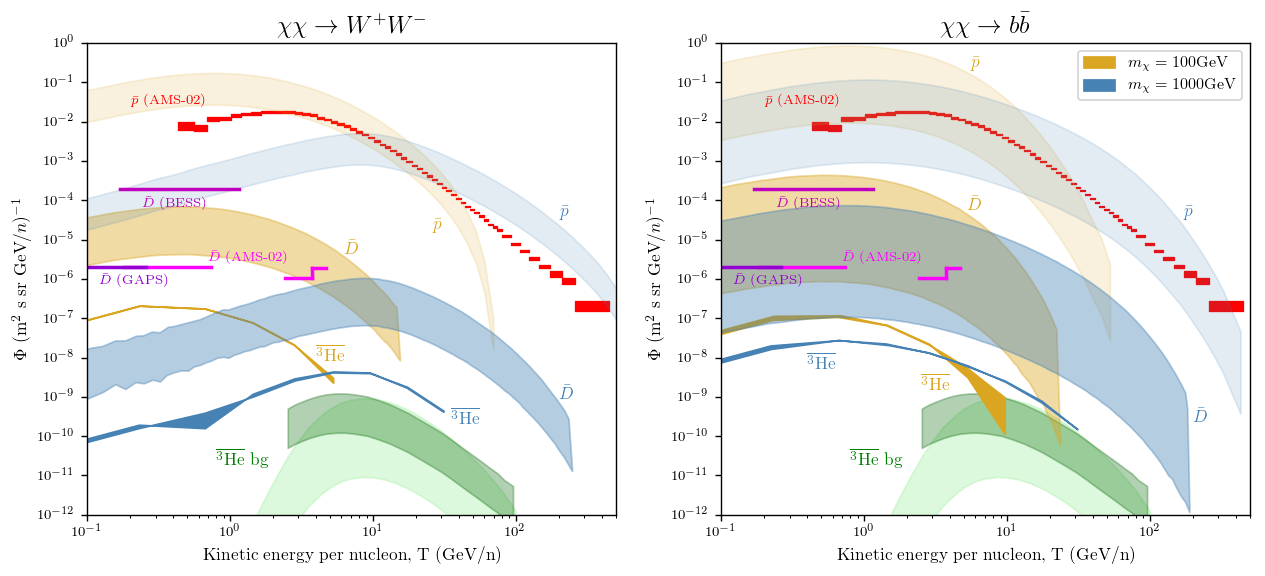

In [9]:
plt.figure(figsize=(12, 5))

pm = "MAX"
phiF = 0.5
intMethod3Hebar = "MethodAnn"

plt.subplot(1, 2, 1)
plotAntinuc(spectra, [100, 1000], "W+W-", phiF, pm, sigmaVs1yr, intMethod3Hebar)

# Label species
plt.text(2.6e1, 1.8e-5, r"$\bar{p}$", fontsize=10, color=colors[100])
plt.text(6.3e0, 4.5e-6, r"$\bar{D}$", fontsize=10, color=colors[100])
plt.text(4e0, 8e-9, r"$\overline{^3{\rm He}}$", fontsize=10, color=colors[100])

plt.text(2e2, 4e-5, r"$\bar{p}$", fontsize=10, color=colors[1000])
plt.text(2e2, 9e-10, r"$\bar{D}$", fontsize=10, color=colors[1000])
plt.text(3.5e1, 2e-10, r"$\overline{^3{\rm He}}$", fontsize=10, color=colors[1000])

commonFormatting("W+W-")

#plt.title(r"1 $\overline{^3{\rm He}}\ {\rm yr}^{-1},\ \chi\chi \to W^+ W^-$")

#############

plt.subplot(1, 2, 2)
plotAntinuc(spectra, [100, 1000], "bbbar", phiF, pm, sigmaVs1yr, intMethod3Hebar)

# Label species
plt.text(5.5e0, 2.4e-1, r"$\bar{p}$", fontsize=10, color=colors[100])
plt.text(5.2e0, 6e-5, r"$\bar{D}$", fontsize=10, color=colors[100])
plt.text(2.5e0, 1.5e-9, r"$\overline{^3{\rm He}}$", fontsize=10, color=colors[100])

plt.text(1.7e2, 4e-5, r"$\bar{p}$", fontsize=10, color=colors[1000])
plt.text(2e2, 2.4e-10, r"$\bar{D}$", fontsize=10, color=colors[1000])
plt.text(4e-1, 5e-9, r"$\overline{^3{\rm He}}$", fontsize=10, color=colors[1000])

commonFormatting("bbbar")

plt.legend(loc="upper right")

#plt.show()

plt.savefig("../../Shared_antihelium3/Submission_PRD/1peryear.pdf")

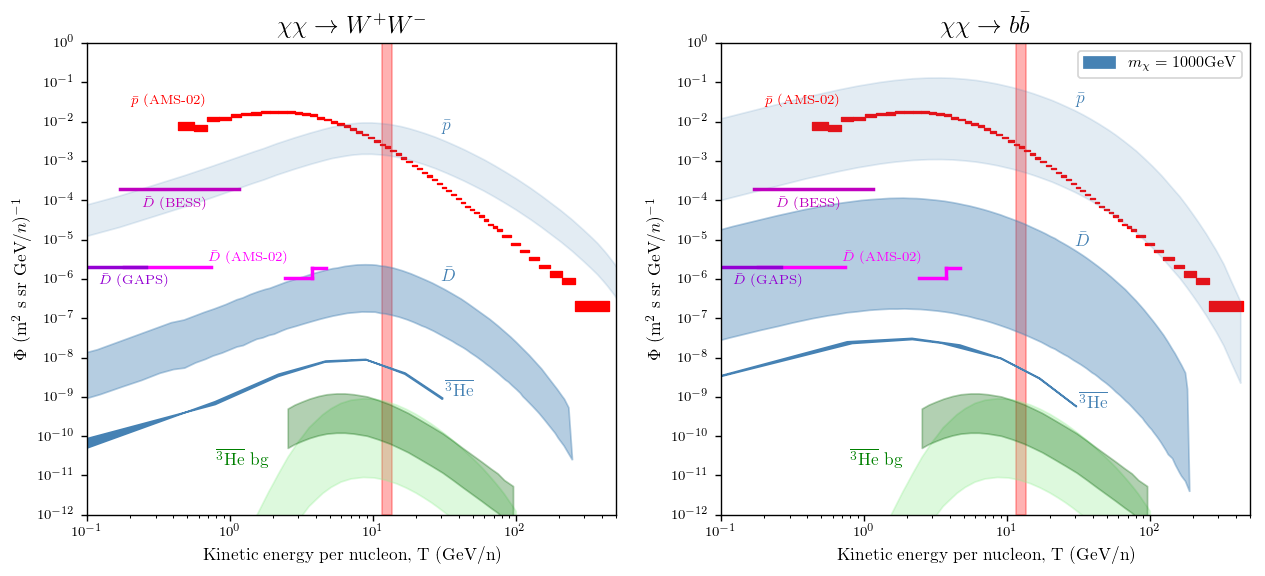

In [10]:
plt.figure(figsize=(12, 5))

pm = "MIN"
phiF = 1.5
intMethod3Hebar = "MethodAnn"

plt.subplot(1, 2, 1)
plotAntinuc(spectra, [1000], "W+W-", phiF, pm, sigmaVs12GeVn, intMethod3Hebar)

# Label species
plt.text(3e1, 6e-3, r"$\bar{p}$", fontsize=10, color=colors[1000])
plt.text(3e1, 9e-7, r"$\bar{D}$", fontsize=10, color=colors[1000])
plt.text(3.2e1, 1e-9, r"$\overline{^3{\rm He}}$", fontsize=10, color=colors[1000])

# Highlight relevant bin
plt.fill_betweenx([1e-12, 1e1], Tmin12GeVn, Tmax12GeVn, alpha=0.3, color='red')

# Indicate direction of increasing coalescence momentum
#plt.arrow(5e0, 5e-12, 0, 3.0e-11, length_includes_head=True, shape="full", head_length=2.0e-11, head_width=1.0, linewidth=2.0, color="lightgreen", alpha=0.9)
#plt.arrow(9e0, 2.16e-6, 0, -1.8e-6, length_includes_head=True, shape="full", head_length=0.3e-6, head_width=1.8, linewidth=2.0, color="steelblue", alpha=0.9)
#plt.arrow(4e0, 5e-3, 0, -3.5e-3, length_includes_head=True, shape="full", head_length=0.8e-3, head_width=0.7, linewidth=2.0, color="steelblue", alpha=0.9)

commonFormatting("W+W-")

#plt.title(r"0.2 $R\sim 12\ {\rm GV}\ \overline{^3{\rm He}}\ {\rm yr}^{-1},\ \chi\chi \to W^+ W^-$")

#############

plt.subplot(1, 2, 2)
plotAntinuc(spectra, [1000], "bbbar", phiF, pm, sigmaVs12GeVn, intMethod3Hebar)
# Label species
plt.text(3e1, 3e-2, r"$\bar{p}$", fontsize=10, color=colors[1000])
plt.text(3e1, 7e-6, r"$\bar{D}$", fontsize=10, color=colors[1000])
plt.text(3.2e1, 5e-10, r"$\overline{^3{\rm He}}$", fontsize=10, color=colors[1000])

# Highlight relevant bin
plt.fill_betweenx([1e-12, 1e1], Tmin12GeVn, Tmax12GeVn, alpha=0.3, color='red')

# Indicate direction of increasing coalescence momentum
#plt.arrow(5e0, 5e-12, 0, 3.0e-11, length_includes_head=True, shape="full", head_length=2.0e-11, head_width=1.0, linewidth=2.0, color="lightgreen", alpha=0.9)
#plt.arrow(9e0, 4e-5, 0, -3.6e-5, length_includes_head=True, shape="full", head_length=0.5e-5, head_width=1.8, linewidth=2.0, color="steelblue", alpha=0.9)
#plt.arrow(9e0, 8e-2, 0, -7e-2, length_includes_head=True, shape="full", head_length=0.8e-2, head_width=1.8, linewidth=2.0, color="steelblue", alpha=0.9)

commonFormatting("bbbar")

#plt.title(r"0.2 $R\sim 12\ {\rm GV}\ \overline{^3{\rm He}}\ {\rm yr}^{-1},\ \chi\chi \to b\bar{b}$")

plt.legend(loc="upper right")

#plt.show()

plt.savefig("../../Shared_antihelium3/Submission_PRD/40GeV_5year.pdf")

### Plot of acceptances

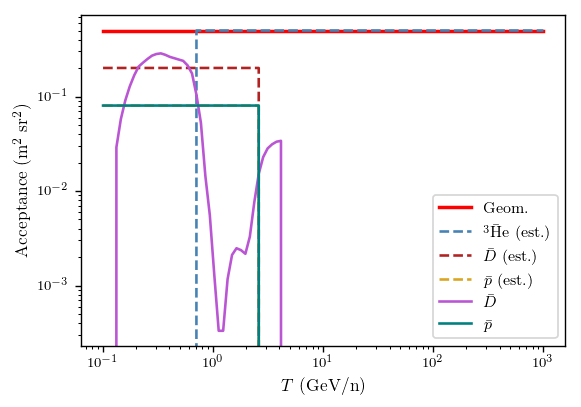

In [13]:
testTs = np.logspace(-1, 3, 100)

plt.plot([1e-1, 1e3], [0.5, 0.5], 'r-', label="Geom.", linewidth=2)

plt.plot(testTs, accHe(testTs), '--', label=r"$\bar{^3{\rm He}}$ (est.)")
plt.plot(testTs, accDbarEst(testTs), '--', label=r"$\bar{D}$ (est.)")
plt.plot(testTs, accpbarEst(testTs), '--', label=r"$\bar{p}$ (est.)")

plt.plot(testTs, accDbar(testTs), label=r"$\bar{D}$")
plt.plot(testTs, accpbarEst(testTs), label=r"$\bar{p}$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$T$ (GeV/n)")
plt.ylabel(r"Acceptance (${\rm m}^2\ {\rm sr}^2$)")
plt.legend(loc="lower right")